# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key 

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print(query_url)
print(api_key)

http://api.openweathermap.org/data/2.5/weather?appid=a5d25c58012afc384081879aa2f7a81f&units=imperial&q=
a5d25c58012afc384081879aa2f7a81f


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(cities)

['norman wells', 'bredasdorp', 'colares', 'fortuna', 'ushuaia', 'am timan', 'broken hill', 'channel-port aux basques', 'yellowknife', 'maragogi', 'puerto ayora', 'baijiantan', 'vaini', 'palmares do sul', 'bluff', 'peleduy', 'khatanga', 'concordia', 'mataura', 'hobart', 'saint anthony', 'nanortalik', 'adrar', 'orlik', 'busselton', 'tahe', 'punta arenas', 'santarem', 'provideniya', 'avarua', 'mount gambier', 'klaksvik', 'kaitangata', 'vaitupu', 'rosetown', 'qaqortoq', 'shimoda', 'taolanaro', 'belushya guba', 'pangnirtung', 'nenjiang', 'castro', 'butaritari', 'airai', 'tiarei', 'nsukka', 'port hardy', 'kabompo', 'tonala', 'barrow', 'barbar', 'tiksi', 'isangel', 'mar del plata', 'taoudenni', 'bireun', 'new norfolk', 'port alfred', 'north bend', 'vichy', 'atuona', 'mahebourg', 'tsirguliina', 'san cristobal', 'luganville', 'butterworth', 'kamenskoye', 'dubai', 'kapaa', 'tezu', 'bengkulu', 'narsaq', 'illoqqortoormiut', 'cape town', 'honningsvag', 'severo-kurilsk', 'portland', 'thompson', 'yan

In [9]:
city1 = ["Paris", "London", "Oslo", "Beijing"]
#type(city1)
type(len(city1))

int

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [72]:
# Humidity (%) vs. Latitude
# Cloudiness (%) vs. Latitude
# Wind Speed (mph) vs. Latitude
# set up lists to hold reponse info
lat = []
max_temp = []
cloud = []
country= []
wind = []
date = []
humidity =[]
city_name= []

#Loop through the list of cities and perform a request for data on each; allow for execeptions if coord doesn't match and keep running through list
x = 0
# = len(city1)

for city in  cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        wind.append(response['wind']['speed'])
        date.append(response["dt"])
        x = (x+1)
        city_name.append(response['name'])
        print(f"Making request number: {x} for city: {cities[x]}")
        
    except KeyError as coord:
        pass
    
print("List Complete")

#print(lat)
#print(max_temp)
#print(humidity)
#print(cloud)
#print(country)
#print(wind)
#print(date)

Making request number: 1 for city: bredasdorp
Making request number: 2 for city: colares
Making request number: 3 for city: fortuna
Making request number: 4 for city: ushuaia
Making request number: 5 for city: am timan
Making request number: 6 for city: broken hill
Making request number: 7 for city: channel-port aux basques
Making request number: 8 for city: yellowknife
Making request number: 9 for city: maragogi
Making request number: 10 for city: puerto ayora
Making request number: 11 for city: baijiantan
Making request number: 12 for city: vaini
Making request number: 13 for city: palmares do sul
Making request number: 14 for city: bluff
Making request number: 15 for city: peleduy
Making request number: 16 for city: khatanga
Making request number: 17 for city: concordia
Making request number: 18 for city: mataura
Making request number: 19 for city: hobart
Making request number: 20 for city: saint anthony
Making request number: 21 for city: nanortalik
Making request number: 22 for ci

Making request number: 180 for city: dikson
Making request number: 181 for city: labuhan
Making request number: 182 for city: san patricio
Making request number: 183 for city: saint george
Making request number: 184 for city: hun
Making request number: 185 for city: burica
Making request number: 186 for city: hermanus
Making request number: 187 for city: chincha alta
Making request number: 188 for city: vysokogornyy
Making request number: 189 for city: guerrero negro
Making request number: 190 for city: college
Making request number: 191 for city: plettenberg bay
Making request number: 192 for city: shingu
Making request number: 193 for city: contamana
Making request number: 194 for city: puerto del rosario
Making request number: 195 for city: victoria
Making request number: 196 for city: lukulu
Making request number: 197 for city: brazzaville
Making request number: 198 for city: rapid city
Making request number: 199 for city: arlit
Making request number: 200 for city: georgetown
Makin

Making request number: 358 for city: sorvag
Making request number: 359 for city: camalu
Making request number: 360 for city: king city
Making request number: 361 for city: malkangiri
Making request number: 362 for city: monrovia
Making request number: 363 for city: fort oglethorpe
Making request number: 364 for city: malino
Making request number: 365 for city: nizhneyansk
Making request number: 366 for city: quesnel
Making request number: 367 for city: uyuni
Making request number: 368 for city: taonan
Making request number: 369 for city: brawley
Making request number: 370 for city: mecca
Making request number: 371 for city: inderborskiy
Making request number: 372 for city: soe
Making request number: 373 for city: doba
Making request number: 374 for city: ponta delgada
Making request number: 375 for city: bosaso
Making request number: 376 for city: teya
Making request number: 377 for city: pozo colorado
Making request number: 378 for city: waipawa
Making request number: 379 for city: in

Making request number: 537 for city: houma
Making request number: 538 for city: talnakh
Making request number: 539 for city: arkhara
Making request number: 540 for city: clonakilty
Making request number: 541 for city: sibolga
Making request number: 542 for city: alugan
Making request number: 543 for city: masaka
Making request number: 544 for city: tasbuget
Making request number: 545 for city: gweta
Making request number: 546 for city: sulangan
Making request number: 547 for city: manica
Making request number: 548 for city: chapais
Making request number: 549 for city: mweka
Making request number: 550 for city: tumannyy
Making request number: 551 for city: loiza
Making request number: 552 for city: high level
Making request number: 553 for city: vedaranniyam
Making request number: 554 for city: whitianga
Making request number: 555 for city: abnub
Making request number: 556 for city: bela pod bezdezem
Making request number: 557 for city: koindu
List Complete


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [81]:
# create a data frame from cities, lat, max temp, cloud, wind, country, date, humidity, and city name
weather_dict = {
    "City": city_name,
    "Latitude": lat,
    "Max Temperature": max_temp,
    "Cloud": cloud,
    "Wind Speed" : wind,
    "Country" : country,
    "Humidity" : humidity,
    "Date" : date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Latitude,Max Temperature,Cloud,Wind Speed,Country,Humidity,Date
0,Norman Wells,65.28,62.6,75,13.87,CA,39,1560968331
1,Bredasdorp,-34.53,53.6,100,2.59,ZA,54,1560968331
2,Colares,38.80,73.4,20,11.41,PT,60,1560968332
3,Fortuna,38.18,88.0,0,6.93,ES,50,1560968332
4,Ushuaia,-54.81,46.4,40,20.80,AR,36,1560968332


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

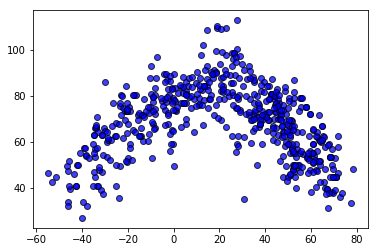

In [101]:
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"], marker = "o", facecolors = "blue", edgecolors = "black", 
 alpha = 0.75)

plt.title = "City Latitude vs. Max Temperature"
plt.xlabel ="Latitude"
plt.ylabel = "Max Temperature (F)"
plt.savefig("lat_vs._temp.png")
plt.show()

#### Latitude vs. Humidity Plot

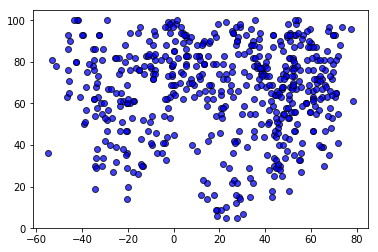

In [98]:
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], marker = "o", facecolors = "blue", edgecolors = "black", 
 alpha = 0.75)

plt.title = "City Latitude vs. Humidity"
plt.xlabel ="Latitude"
plt.ylabel = "Humidity (%)"
plt.savefig("Lat_vs_humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

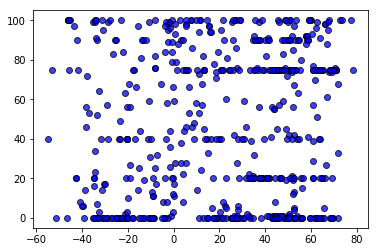

In [99]:
plt.scatter(weather_data["Latitude"], weather_data["Cloud"], marker = "o", facecolors = "blue", edgecolors = "black", 
 alpha = 0.75)

plt.title = "City Latitude vs. Cloudness"
plt.xlabel ="Latitude"
plt.ylabel = "Cloudiness (%)"
plt.savefig("Lat_vs_cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

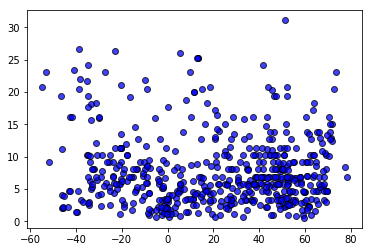

In [100]:
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker = "o", facecolors = "blue", edgecolors = "black", 
 alpha = 0.75)

plt.title = "City Latitude vs. Windspeed"
plt.xlabel ="Latitude"
plt.ylabel = "Wind Speed (mph)"
plt.savefig("Lat_vs_windspeed.png")
plt.show()

3 Observations:
1. Latitude doesn't seem to have much correlation to windspeed.  Across all the latitudes, windspeed is mainly grouped beween 0-15 MPH, with some speeds outlining high speeds.

2. The hottest temperatures seem to be between -20 and 40 degrees latitude, with the lowest at -60, and 80 degress, respectively. 

3. There doesn't seem to be much correlation between cloudiness and latitude. Furthermore, it appears that the percentages are commonly 20% intervals, which is why you see lines across all latitudes, especially at 0 and 100%. 